In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import chart_studio.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import plot 

#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


In [2]:
tesla=pd.read_csv("C:\\Users\\laksh\\Downloads\\dataset.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')


Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460 days


In [6]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


<Axes: >

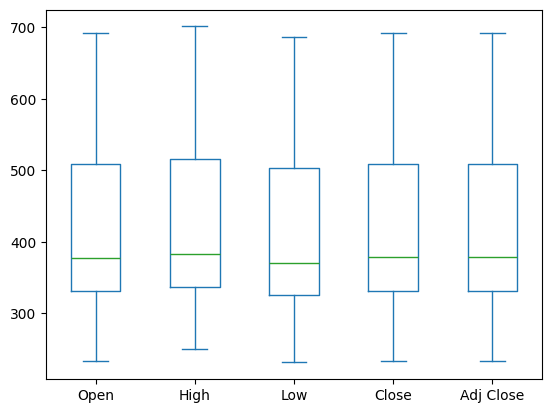

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the layout for our plot
layout = go.Layout(
    title = 'Stock Prices Of Tesla',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
)
tesla_data =go.Scatter({'x':tesla['Date'],'y':tesla['Close']})
plot = go.Figure(data = tesla_data, layout = layout)

In [9]:
iplot(plot)

In [10]:
#building the regression model
from sklearn.model_selection import train_test_split

#preprocessing the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets
x=np.array(tesla.index).reshape(-1,1)
y=tesla['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [12]:
#Feature Scaling
scaler=StandardScaler().fit(x_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a Linear Model
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
trace1 = go.Scatter(
    x=x_train.T[0],
    y=lm.predict(x_train).T,
    mode='lines',
    name='Predicted'
)
# Create a figure layout
layout = go.Layout(
    xaxis=dict(title='Day') 
)
tesla_data = [trace0, trace1]
plot2 = go.Figure(data=tesla_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,lm.predict(x_train))}\t{r2_score(y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,lm.predict(x_train))}\t{mse(y_test,lm.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944174	0.7261648669848495
MSE       3403.0038800025172	3460.988580958064

